In [1]:
%cd drive/MyDrive/noval-seam-carving-method/

/content/drive/MyDrive/noval-seam-carving-method


In [2]:
from myfunctions import SM_creator, GM_creator, DM_creator
from seam_carving_functions import find_seam, remove_seam, find_energy_range
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import torch

# Generate Gradient Map

In [3]:
model_path = 'final-models/bdcn_bsds500.pth'
img_folder = './images'
orgimg_path = './images/view1.png'
cuda = True

In [4]:
gradient_map = GM_creator(img_folder, orgimg_path, model_path, cuda)

/content/drive/My Drive/noval-seam-carving-method/GM_src/bdcn.py:199: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(param, 0.080)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Generate Saliency Map

In [5]:
device = torch.device(device='cuda')
img_folder='./images'
orgimg_path = 'images/view1.png'
model_path='final-models/best-model.pth'
img_size = 256
bs = 24

In [6]:
saliency_map = SM_creator(img_folder, orgimg_path, model_path, img_size, bs, device)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


# Read Depth Map

In [7]:
dispimg_path = 'depth_map/disp1.png'
import cv2

In [8]:
depth_map = DM_creator(dispimg_path)
depth_map = cv2.cvtColor(depth_map, cv2.COLOR_RGB2GRAY)
depth_map = depth_map/255.0

# Show maps

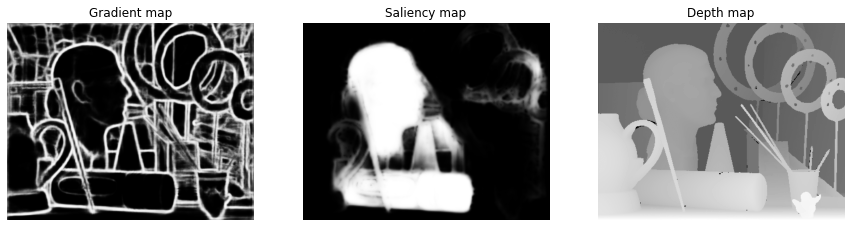

In [9]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(1,3,1)
plt.imshow(gradient_map, cmap = 'gray')
plt.axis('off')
plt.title("Gradient map")
fig.add_subplot(1,3,2)
plt.imshow(saliency_map, cmap = 'gray')
plt.axis('off')
plt.title("Saliency map")
fig.add_subplot(1,3,3)
plt.imshow(depth_map, cmap = 'gray')
plt.axis('off')
plt.title("Depth map");

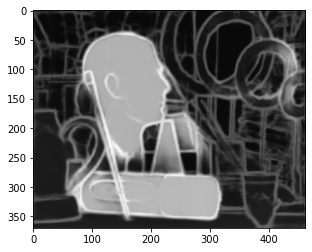

In [27]:
new_map1 = (2*gradient_map + 4*saliency_map + depth_map)/7
plt.imshow(new_map1, cmap='gray')
plt.show()


In [28]:
orgimg_path = 'images/view1.png'
image = cv2.imread(orgimg_path)
# energy_list = find_energy_range(image, new_map1, 1)

In [30]:
emap = new_map1
img = image

# یک و فقط یک بار نقشه انرژی ساخته شود


In [31]:
for i in range(100):
  minval, minIndex, sOfIJ = find_seam(image, new_map1)
  image = remove_seam(image, minIndex, sOfIJ)
  new_map1 = remove_seam(new_map1, minIndex, sOfIJ)
  new_map1 = new_map1[:,:,0]

Text(0.5, 1.0, 'Original image')

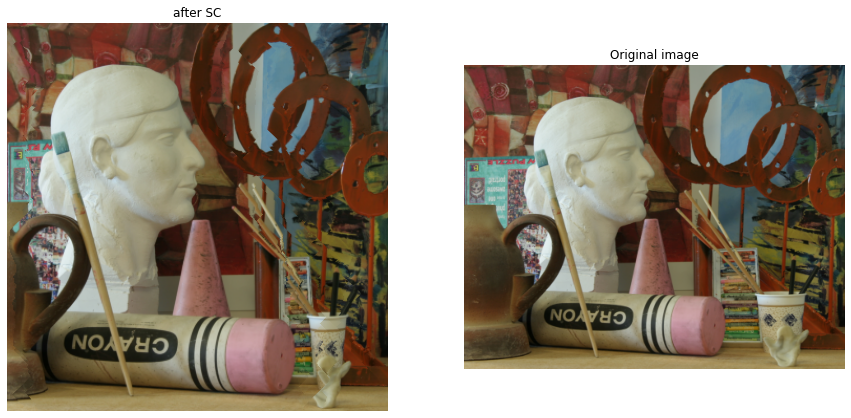

In [40]:
import numpy as np
image1 = image.astype(np.uint8)
image2 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(15,20))
fig.add_subplot(1,2,1)
plt.imshow(image2)
plt.axis('off')
plt.title("after SC")
fig.add_subplot(1,2,2)
image3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image3)
plt.axis('off')
plt.title("Original image")

In [6]:
import torch
global img_folder
global orgimg_path
global dispimg_path
global gmodel_path
global smodel_path
global img_size
global bs
global cuda
global device
img_folder = 'img_temp'
orgimg_path = 'img_temp.png'
dispimg_path = 'disp_temp/disp_temp.png'
gmodel_path = 'final-models/bdcn_bsds500.pth'
smodel_path = 'final-models/best-model.pth'
img_size = 256
bs = 24
cuda = True
device = torch.device(device='cuda')

In [4]:
global a
a = 5

In [ ]:
def produce_emap():
  gradient_map = GM_creator(img_folder, orgimg_path, gmodel_path, cuda)
  saliency_map = SM_creator(img_folder, orgimg_path, smodel_path, img_size, bs, device)
  depth_map = DM_creator(dispimg_path)
  depth_map = cv2.cvtColor(depth_map, cv2.COLOR_RGB2GRAY)
  depth_map = depth_map/255.0

In [ ]:


for i in range(50): #Delete 50 Seams
  minval, minIndex, sOfIJ = find_seam(img, energy)
  print minval
  img = remove_seam(img, minIndex, sOfIJ)
  img = remove_seam(img, minIndex, sOfIJ)

  os.chdir('img_temp')
  cv2.imwrite('img_temp.png', img)
  energy = produce_emap(img_folder, orgimg_path, gmodel_path, smodel_path, img_size, bs, cuda, device, dispimg_path)